In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import shutil
from skimage import morphology

In [3]:
path = './TCIA_new'

In [4]:
lung_seg_dic={}
for file in os.listdir(os.path.join(path,'patches_euclidean')):
    ct=cv2.imread(os.path.join(path,'patches_euclidean',file),cv2.IMREAD_UNCHANGED)
    mask=cv2.imread(os.path.join(path,'mask',file),cv2.IMREAD_UNCHANGED)
    
    binary_img=ct.copy()
    for i in range(len(ct)):
        for j in range(len(ct[i])):
            if ct[i][j]>206:
                binary_img[i][j]=0 
            else:
                binary_img[i][j]=255
    
    eroded = morphology.erosion(binary_img,np.ones([3,3]))
    dilation = morphology.dilation(eroded,np.ones([8,8]))
    eroded2 = morphology.erosion(dilation,np.ones([3,3]))
    dilation2 = morphology.dilation(eroded2,np.ones([8,8]))
    eroded3 = morphology.erosion(dilation2,np.ones([13,13]))

    lung_seg_dic[file]=eroded3

099029.png


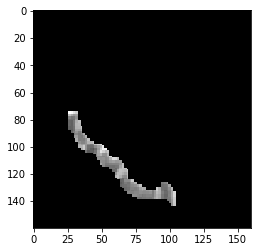

239031.png


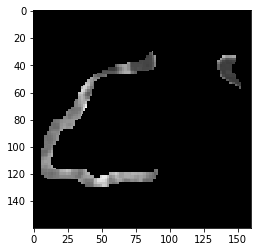

173036.png


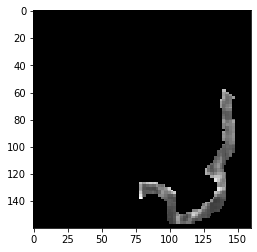

061034.png


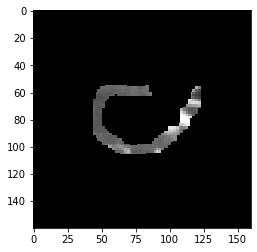

285040.png


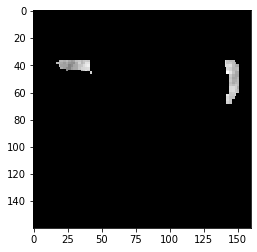

155030.png


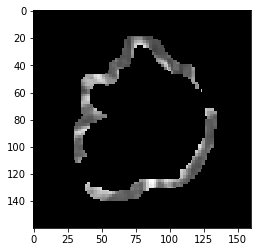

225036.png


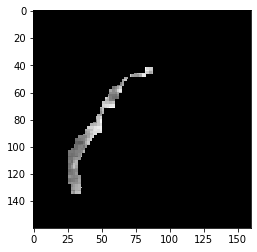

024031.png


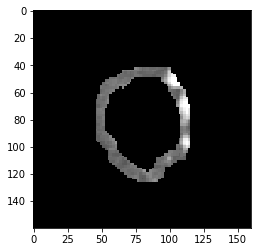

047031.png


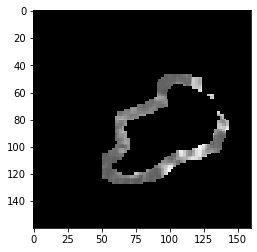

034030.png


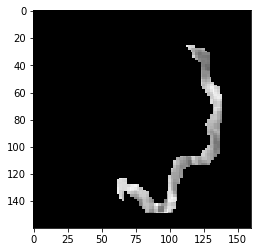

073031.png


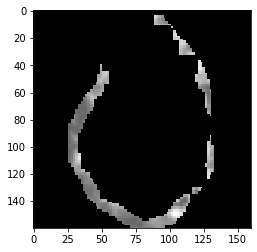

063034.png


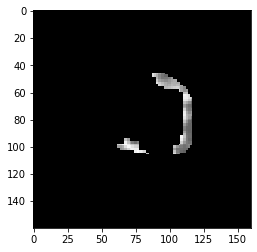

092032.png


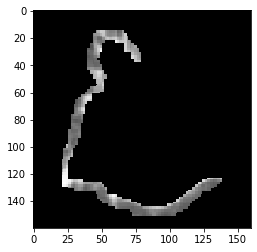

045031.png


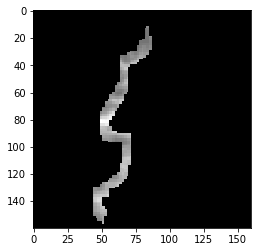

258027.png


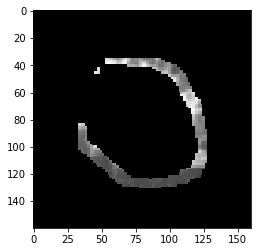

115028.png


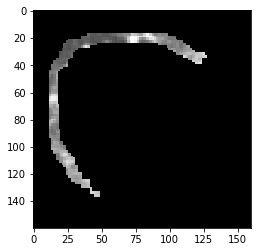

208028.png


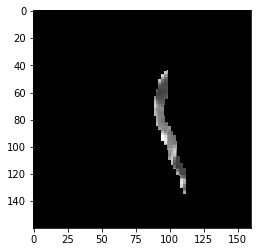

237031.png


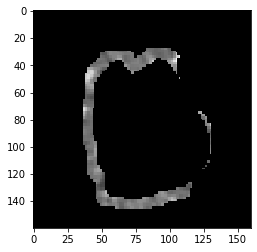

145032.png


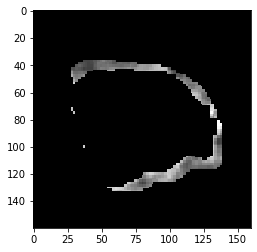

279029.png


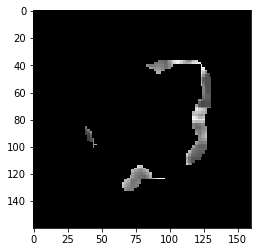

012036.png


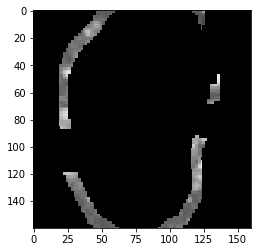

266032.png


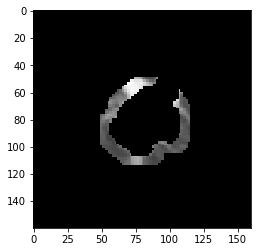

026041.png


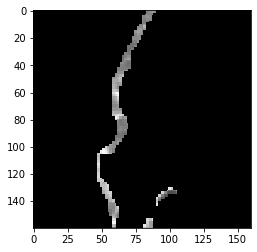

096033.png


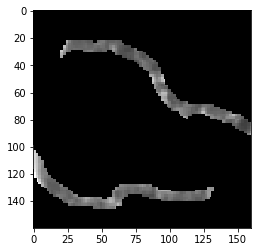

041030.png


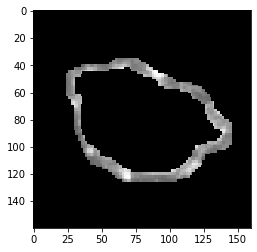

250032.png


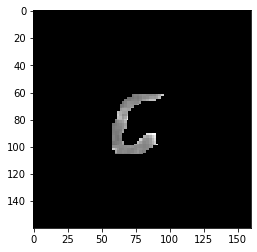

233024.png


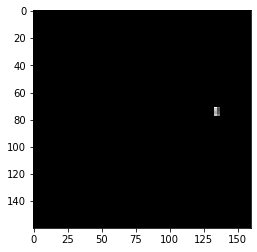

022032.png


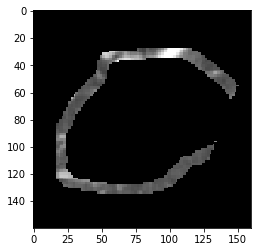

122033.png


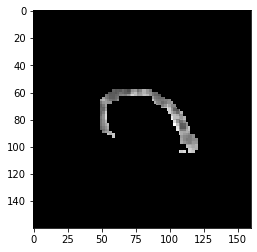

114032.png


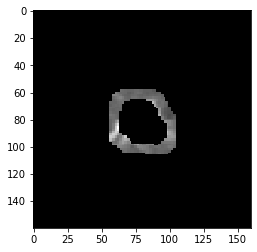

014032.png


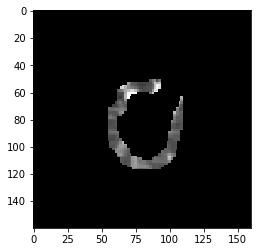

252034.png


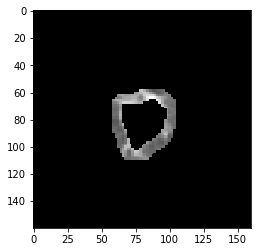

224029.png


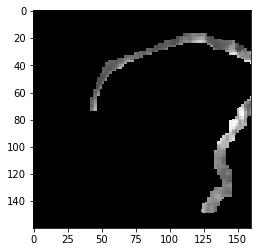

143036.png


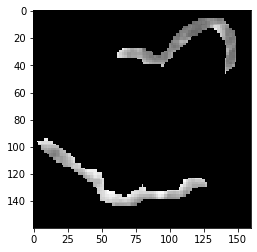

030033.png


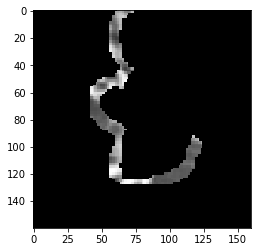

190040.png


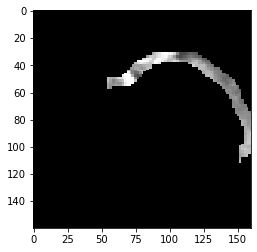

008033.png


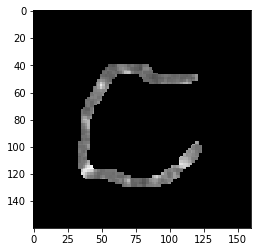

257028.png


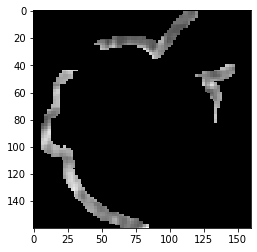

200038.png


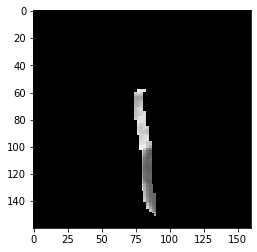

167033.png


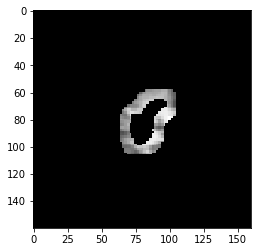

264031.png


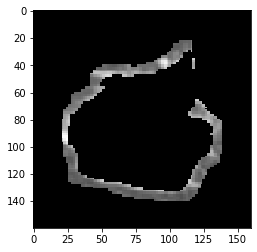

151033.png


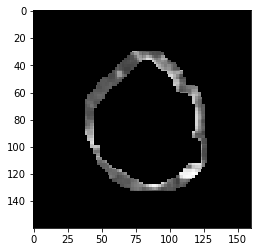

018035.png


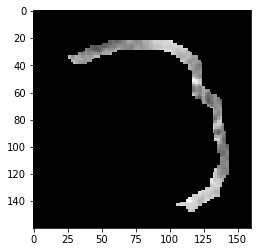

098033.png


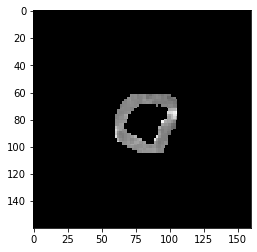

177035.png


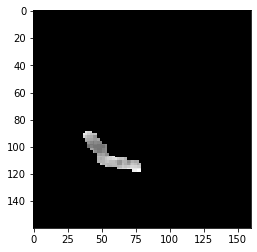

046028.png


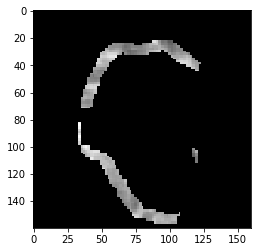

032024.png


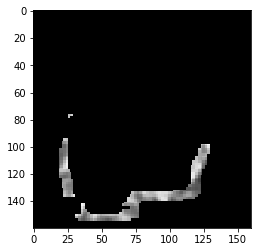

276027.png


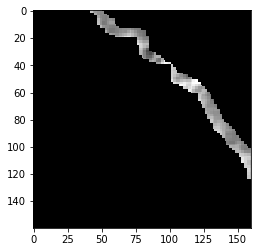

116031.png


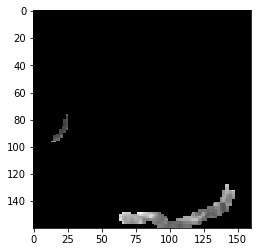

053035.png


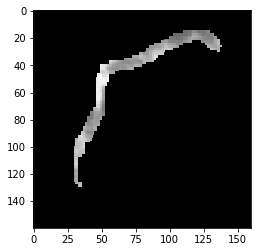

268033.png


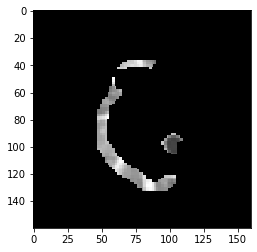

006034.png


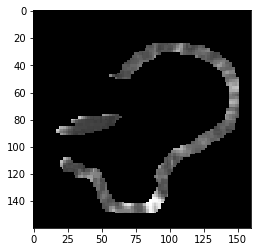

284041.png


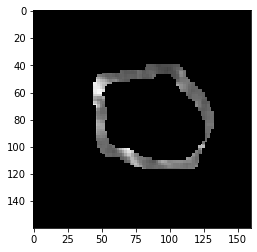

035034.png


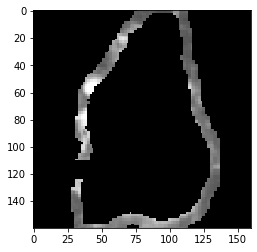

292031.png


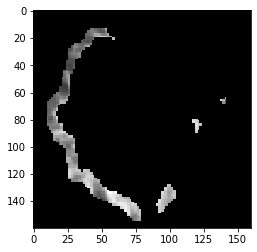

104028.png


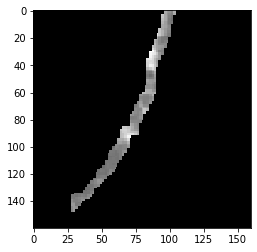

004029.png


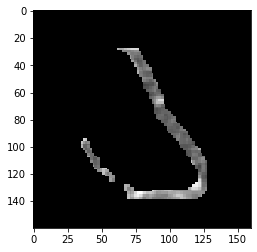

210033.png


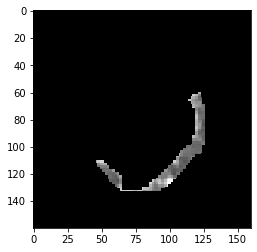

130039.png


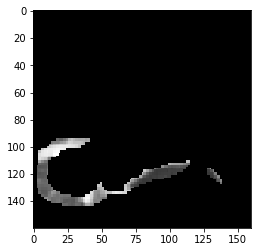

011036.png


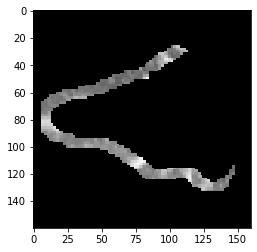

054033.png


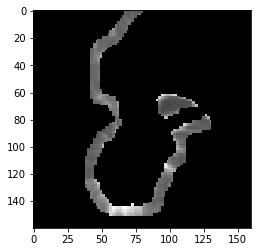

101036.png


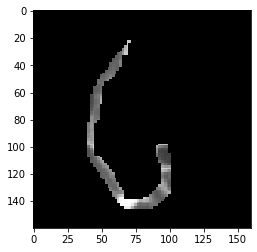

095044.png


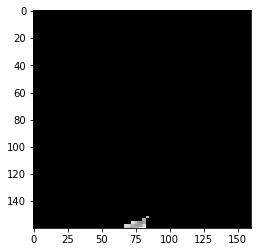

242029.png


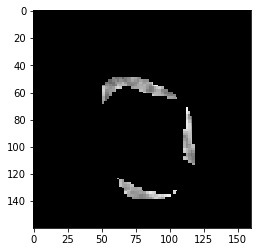

202035.png


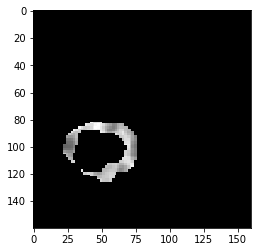

146034.png


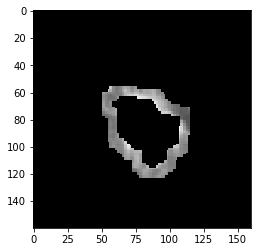

025034.png


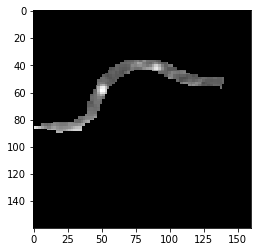

263032.png


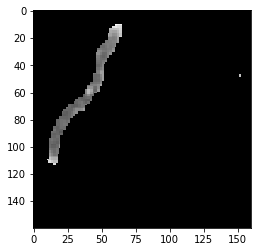

181032.png


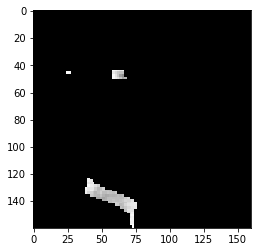

135030.png


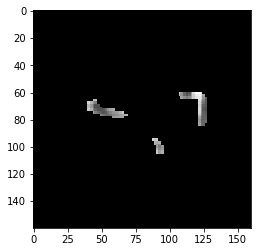

093032.png


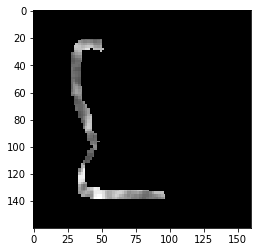

193026.png


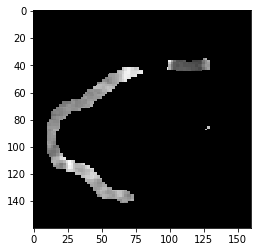

037035.png


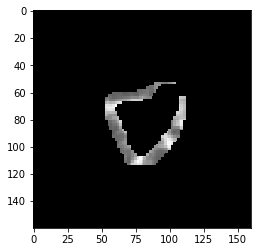

290030.png


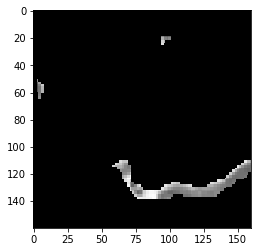

197031.png


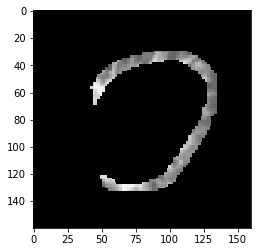

123033.png


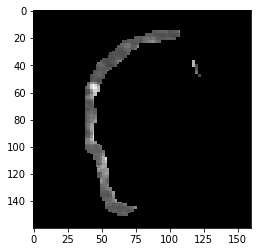

064032.png


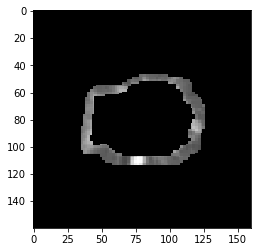

009036.png


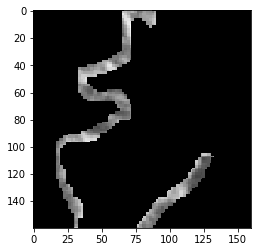

107033.png


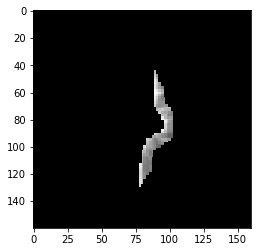

265034.png


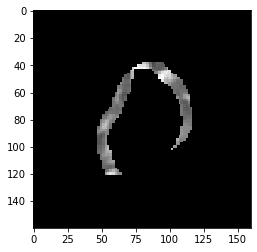

007031.png


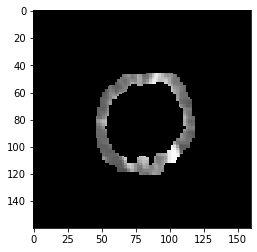

042034.png


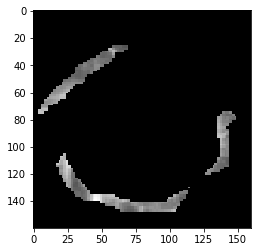

222036.png


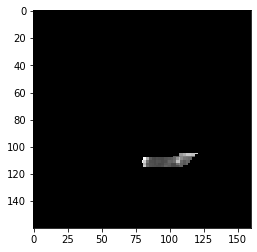

131031.png


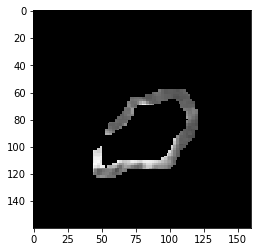

109035.png


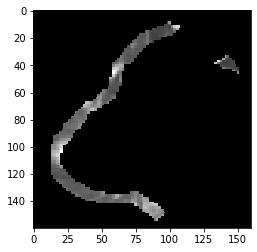

050034.png


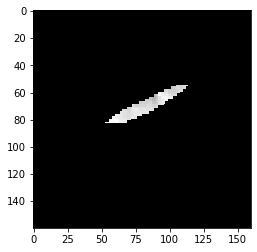

230036.png


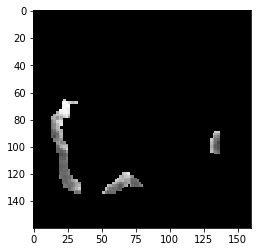

176030.png


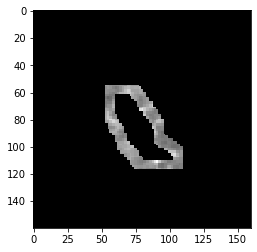

052035.png


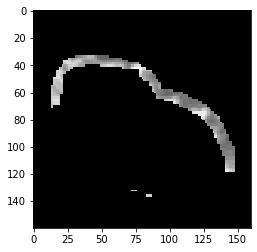

163029.png


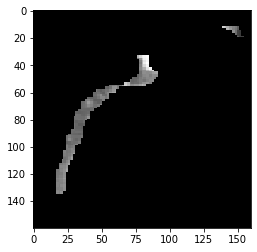

117025.png


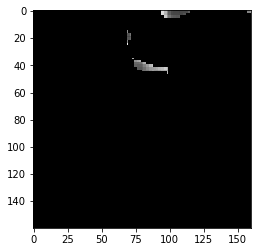

206032.png


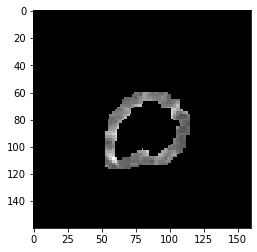

078032.png


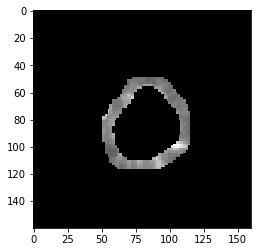

121033.png


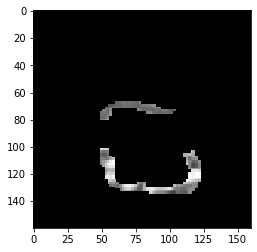

288033.png


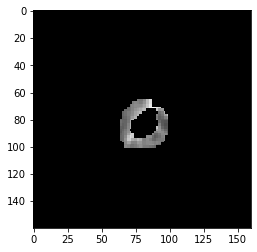

296032.png


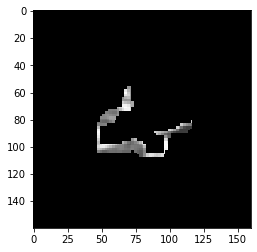

105033.png


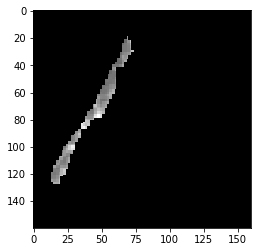

005027.png


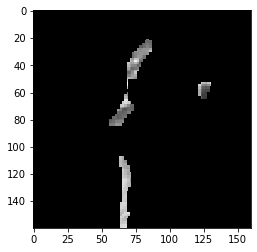

150032.png


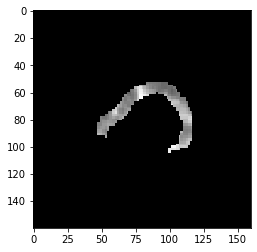

068036.png


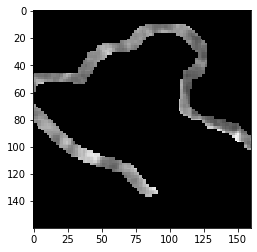

In [6]:
for file in lung_seg_dic.keys():
    ct=cv2.imread(os.path.join(path,'patches_euclidean',file),cv2.IMREAD_UNCHANGED)
    mask=cv2.imread(os.path.join(path,'mask',file),cv2.IMREAD_UNCHANGED)
    patch=ct.copy()
    
    kernel=np.ones((15,15),np.uint8)
    dilation_mask=cv2.dilate(mask,kernel,iterations=1)
    for i in range(len(dilation_mask)):
        for j in range(len(dilation_mask[i])):
            if lung_seg_dic[file][i][j]==0:
                patch[i][j]=0
            if mask[i][j]==0 and dilation_mask[i][j]!=0:
                continue
            else:
                patch[i][j]=0
    
    cv2.imwrite(os.path.join(path,'peritumoral_patches',file),patch)
    print(file)
    plt.imshow(patch,cmap='gray')
    plt.show()